# Rummy Table Analysis

## Background

Game - www.jungleerummy.com <br>
In Rummy there is a Lobby where 13 Card Point Games are featured (please call me for any clarifications). These 13 Card Point Games have different ‘entry fees’ (the money the user pays to play the game, if they win they win the entry fee of the other player), so different fees are charged ultimately allowing a user to play a Rs 5 game or Rs 1000 game or Rs 10,000 game.

## Objective

With the data provided, analyze and recommend what tables to be added, removed, or edited in order to maximize revenue and increase engagement.

## Data source

The data set provided by Junglee has table data for cash 13 cards points rummy from 1st Aug 2015 to 31 Jan 2016.

## Data attributes

| Label      | Description                                                                                                                                                                                                                       |
|------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Entry Fee  |  This   is Buy-in in rupees to enter the game and max amount that can be lost in a   game.                                                                                                                                        |
| Type       |  This is game variant. In the data   set we just have13 card points Rummy ( Game variant ).                                                                                                                                       |
| NoOfTable  |  This is number of active tables   for each configuration.  ( A configuration is based on unique combination of   "EntryFee", "Type", "Seat", "Rapid".)   Active tables means at-least 1 game played for the config during a day. |
| Seats      |  Max number of players that can sit   on the table i.e. 2,4,6 for the data set.                                                                                                                                                   |
| Rapid      |  This is table where turn time is   half the time of turn timer for regular tables. If table is rapid value in   column is 1.                                                                                                     |
| Game rake  |  % amount deducted for each game   from the winnings on the table . This is revenue for the company.                                                                                                                              |
| NoOfUsers  |  Total number of unique players who   played at least 1 game for table config for the date.                                                                                                                                       |
| NoOfGames  |  Total number of games played on   table config for the date.                                                                                                                                                                     |
| Rake       |  Amount generated in revenue from a   table config for the date.                                                                                                                                                                  |

## Analysis pipeline - the OSEMN approach

 - **Obtain the data** <br>
 The dataset is an extract of the GMB corpus which is tagged, annotated. It is in tab separated text file.
 - **Scrubbing / Cleaning the data** <br>
 Initial data exploration and preparation for analysis
 - **Exploring / Visualizing our data** <br>
 Basic EDA to understand the data
 - **Modeling the data** <br>
 - **Interpreting the results** <br>

As per the scope of this analysis, we will limit ourselves to the EDA step only

### Environment set-up and loading dependencies

Anaconda is used to do the analysis, which is an easy-to-install, free, enterprise-ready Python distribution for data analytics, processing, and scientific computing.
Dependencies used are below -

In [1]:
#Data analysis
import numpy as np
import pandas as pd
import datetime
import calendar
#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Obtain the data

In [2]:
data = pd.read_excel('TableAnalysis-DataSet.xlsx')

In [3]:
data.head()

,EntryFee,Type,NoOfTable,Seats,Rapid,gameRake,noofusers,NoOfGames,Rake,Date
0,1,Point,5,2,0,0.15,395,1881,98.33,2015-08-01
1,1,Point,5,2,0,0.15,344,1638,80.73,2015-08-02
2,1,Point,5,2,0,0.15,314,1405,76.34,2015-08-03
3,1,Point,4,2,0,0.15,116,457,23.89,2015-08-04
4,1,Point,1,2,0,0.15,77,354,17.71,2015-08-05


## Scrubbing / Cleaning the data 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9190 entries, 0 to 9189
Data columns (total 10 columns):
EntryFee     9190 non-null int64
Type         9190 non-null object
NoOfTable    9190 non-null int64
Seats        9190 non-null int64
Rapid        9190 non-null int64
gameRake     9190 non-null float64
noofusers    9190 non-null int64
NoOfGames    9190 non-null int64
Rake         9190 non-null float64
Date         9190 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 718.0+ KB


*The dataset contains 9190 samples, and there are no null values in any of the columns <br>
Since we have a date column, we will extract the day of the week to make more sense of the data*

In [5]:
dayofweek = []
for x in data['Date']:
    dayofweek.append(x.strftime("%A"))
data['Day'] = dayofweek
data.head()

,EntryFee,Type,NoOfTable,Seats,Rapid,gameRake,noofusers,NoOfGames,Rake,Date,Day
0,1,Point,5,2,0,0.15,395,1881,98.33,2015-08-01,Saturday
1,1,Point,5,2,0,0.15,344,1638,80.73,2015-08-02,Sunday
2,1,Point,5,2,0,0.15,314,1405,76.34,2015-08-03,Monday
3,1,Point,4,2,0,0.15,116,457,23.89,2015-08-04,Tuesday
4,1,Point,1,2,0,0.15,77,354,17.71,2015-08-05,Wednesday


*We will now divide the dataset into two sub-datasets -* <br>
1. Table containing the fundamental attributes which make up Table number
2. Table containing game data wrt Table number

In [6]:
data_table = data.filter(['NoOfTable', 'gameRake', 'noofusers', 'NoOfGames', 'Rake', 'Day'], axis = 1)
data_strat = data.filter(['EntryFee', 'NoOfTable', 'Seats', 'Rapid'], axis = 1)

## Exploring / Visualizing our data

*Let's check the unique values in each attribute to understand the dataset better.*

In [7]:
for x in data.columns:
    print("Unique values in ", x, "are: ", data[x].unique())
    print("No. of unique values: ", data[x].nunique())

Unique values in  EntryFee are:  [    1     4     8    10    20    40    50    80   100   160   240   400
   500   800  1000  1200  1600  2000  2400  3000  5000 10000]
No. of unique values:  22
Unique values in  Type are:  ['Point']
No. of unique values:  1
Unique values in  NoOfTable are:  [ 5  4  1  6 12 10 19 39 20 16  9  2 18  3  8 13 15 36 17  7 22 11 48 24 14
 46 23 31 21]
No. of unique values:  29
Unique values in  Seats are:  [2 4 6]
No. of unique values:  3
Unique values in  Rapid are:  [0 1]
No. of unique values:  2
Unique values in  gameRake are:  [ 0.15  0.06  0.12  0.1   0.09]
No. of unique values:  5
Unique values in  noofusers are:  [395 344 314 ...,  18  10   8]
No. of unique values:  1089
Unique values in  NoOfGames are:  [1881 1638 1405 ..., 1176 1429 1036]
No. of unique values:  2424
Unique values in  Rake are:  [  9.83300000e+01   8.07300000e+01   7.63400000e+01 ...,   3.57450000e+04
   1.70002500e+05   1.93380000e+05]
No. of unique values:  9016
Unique values in  D

In [8]:
print('Total number of users: ', data['noofusers'].sum())
print('Total number of games: ', data['NoOfGames'].sum())
print('Revenue made: ',data['Rake'].sum() )

Total number of users:  2370757
Total number of games:  7487612
Revenue made:  194170578.78


#### Dataset summary

- There are 22 different types of Entry fee being charged - ranging from 1 to 10000
- There are 29 possible number of tables based on the different combinations of Entry Fee, Seats, Type and Rapid
- There are 3 different types of seats - 2,4,6
- There are 5 different amounts by % for game rake - 0.06, 0.09, 0.1, 0.12, 0.15
- The dataset contains data for 183 days
- Between the observation period, 2370757 users played the game
- Between the observation period, 7487612 games were played
- Between the observation period, 194170578.78 revenue was made

*Now let's check the split of data averaged over every day of the week.*

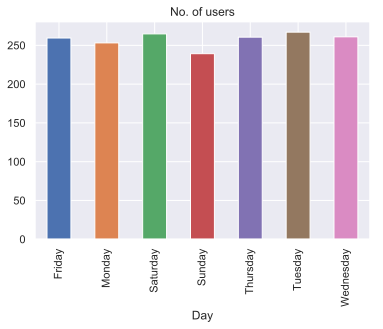

In [9]:
data_table.groupby(['Day'])['noofusers'].agg('mean').plot(kind='bar', title = 'No. of users')

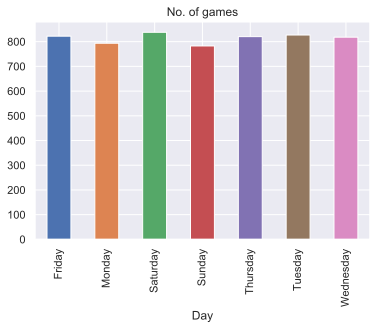

In [10]:
data_table.groupby(['Day'])['NoOfGames'].agg('mean').plot(kind='bar', title = 'No. of games')

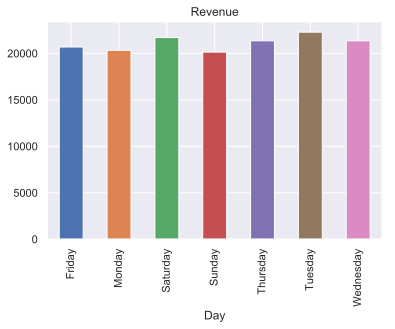

In [11]:
data_table.groupby(['Day'])['Rake'].agg('mean').plot(kind='bar', title = 'Revenue')

*Between the observation period, on average the number of users playing the game are highest on Saturday, followed by Tuesday and Friday. The number of games are proportionally higher on the same dates. <br>
It can also be observed that the rake is higher on the same days. <br>
However, the rake is higher on Tuesdays as compared to other days, this may be due to promotional events such as Tuesday Tango where the company is earning higher revenues.*

*Now let's check the stats wrt every table type.*

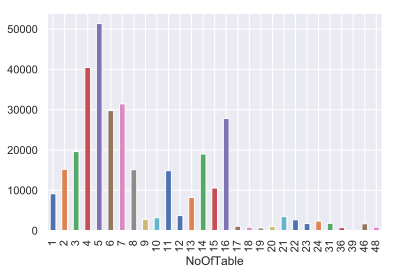

In [12]:
data_table.groupby(['NoOfTable'])['Rake'].agg('mean').plot(kind='bar')

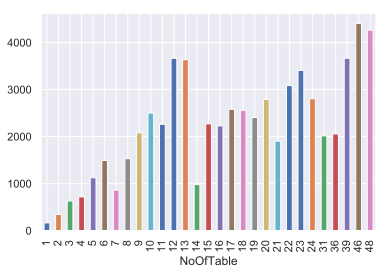

In [13]:
data_table.groupby(['NoOfTable'])['NoOfGames'].agg('mean').plot(kind='bar')

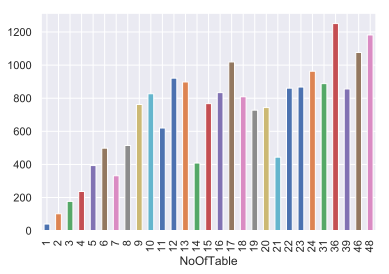

In [14]:
data_table.groupby(['NoOfTable'])['noofusers'].agg('mean').plot(kind='bar')

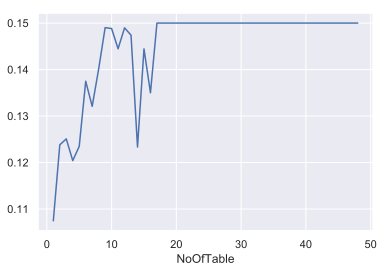

In [16]:
data_table.groupby(['NoOfTable'])['gameRake'].agg('mean').plot(kind='line')

*There are 29 possible number of tables based on the different combinations of Entry Fee, Seats, Type and Rapid. <br>
Between the observation period, the company has made highest revenues on average from 4 and 5. <br>
However, the engagement is highest on the higher table number. The number of users playing the game are highest in table 36, 46, 38 and 17. The number of games played are highest in 46, 48, 12 and 13. <br>
It is possible that users playing on table 36 do not play for a longer time, reducing the number of games played. <br>
As the table number increases the game rake also increases until it takes a fixed amount of 0.15. *

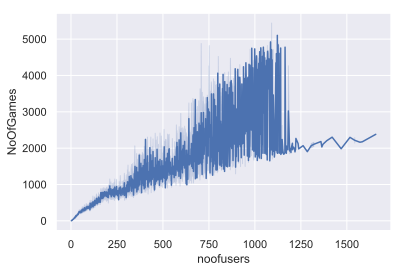

In [17]:
sns.lineplot(x='noofusers', y='NoOfGames', data=data_table)

*It can be observed that the number of users are positively correlated to the number of games. <br>
As the number of users on a table increases, the number of games on average also increases. <br>
We can also observe huge spikes within the user range 500-1200 where the number of games increases expontentially. <br>
Based on this we can infer that on average, the platform houses 1200 users and the number of games played are 2000-5000.*

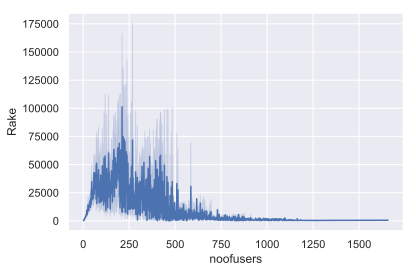

In [18]:
sns.lineplot(x='noofusers', y='Rake', data=data_table)

*As the number of users increase on the platform, the revenue made decreases. <br>
This is a dangerous position to be in because the company is losing the opportunity to monetize on larger user base. <br>
It is possible that as the number of users increases on the platform, the user experience takes a hit as a result of which the revenue decreases. The platform is able to support a user base of 250-500.* 

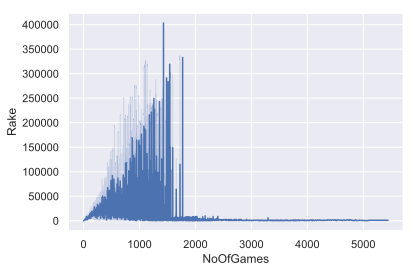

In [19]:
sns.lineplot(x='NoOfGames', y='Rake', data=data_table)

*As expected, the increase in the number of games also hits the rake significantly reducing it after 1500 games. <br>
The platform is able to make exponential revenues when the number of games being played are less than 1500, post which the revenue decreases.Therefore allowing users to continue playing on the same table will not generate revenue.*

*Now let's check how the stats vary wrt each day of the week.*

#### Monday

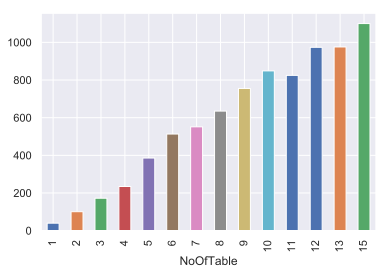

In [20]:
data_table[data_table['Day']=='Monday'].groupby(['NoOfTable'])['noofusers'].agg('mean').plot(kind='bar')

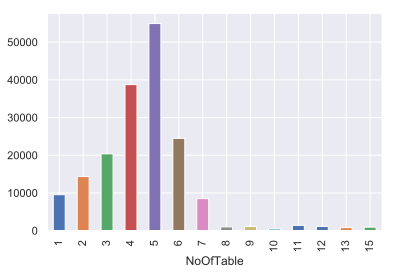

In [21]:
data_table[data_table['Day']=='Monday'].groupby(['NoOfTable'])['Rake'].agg('mean').plot(kind='bar')

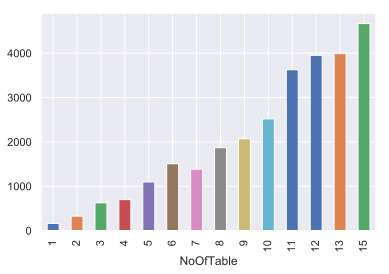

In [22]:
data_table[data_table['Day']=='Monday'].groupby(['NoOfTable'])['NoOfGames'].agg('mean').plot(kind='bar')

*The number of users playing on Monday are highest on table number 15. This is also proportional to the number of games being played. However, the revenue made is highest on table number 5. Post table no. 5, the revenue decreases. <br>
The user engagement is higher on the higher table numbers but they are not generating revenue.*

#### Tuesday

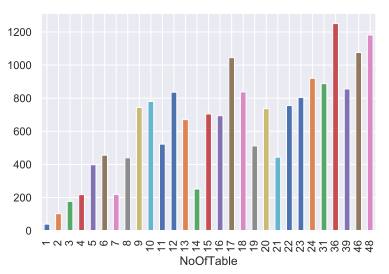

In [23]:
data_table[data_table['Day']=='Tuesday'].groupby(['NoOfTable'])['noofusers'].agg('mean').plot(kind='bar')

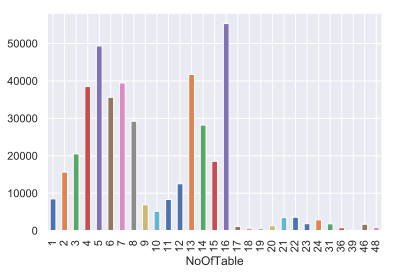

In [25]:
data_table[data_table['Day']=='Tuesday'].groupby(['NoOfTable'])['Rake'].agg('mean').plot(kind='bar')

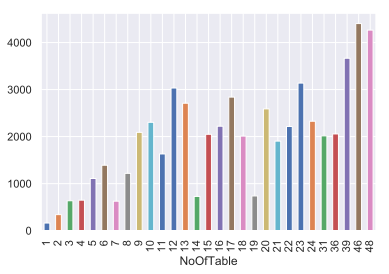

In [24]:
data_table[data_table['Day']=='Tuesday'].groupby(['NoOfTable'])['NoOfGames'].agg('mean').plot(kind='bar')

*On Tuesdays, we observe a heavy rush of people on the platform. This may be due to promotional events being run. <br>
As a result, users play on almost every type of table number. Once again we see a similar trend where the engagement is higher on the higher table numbers but the revenue declines. <br>
Revenue is highest on table number 5 and 16.*

#### Wednesday

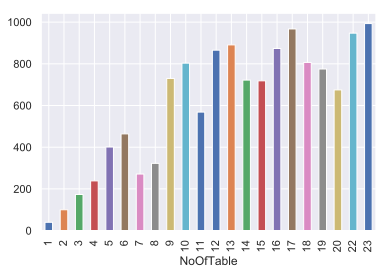

In [26]:
data_table[data_table['Day']=='Wednesday'].groupby(['NoOfTable'])['noofusers'].agg('mean').plot(kind='bar')

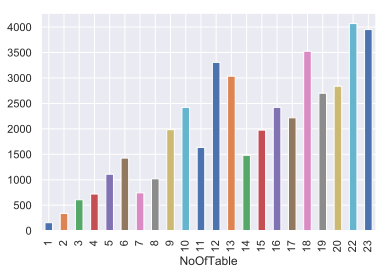

In [27]:
data_table[data_table['Day']=='Wednesday'].groupby(['NoOfTable'])['NoOfGames'].agg('mean').plot(kind='bar')

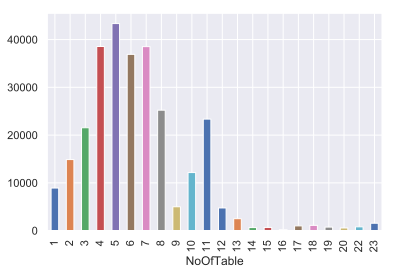

In [28]:
data_table[data_table['Day']=='Wednesday'].groupby(['NoOfTable'])['Rake'].agg('mean').plot(kind='bar')

*Wednesdays see lesser users as compared to Tuesdays. However, the trend remains the same - higher engagement on higher table numbers while high revenues in table no. 4,5,7.*

#### Thursday

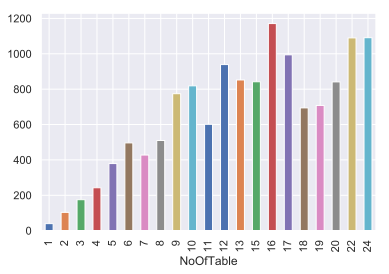

In [29]:
data_table[data_table['Day']=='Thursday'].groupby(['NoOfTable'])['noofusers'].agg('mean').plot(kind='bar')

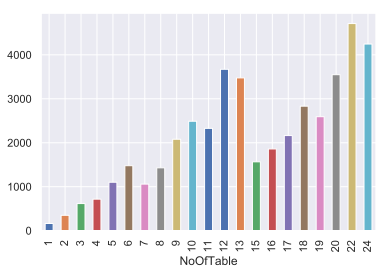

In [30]:
data_table[data_table['Day']=='Thursday'].groupby(['NoOfTable'])['NoOfGames'].agg('mean').plot(kind='bar')

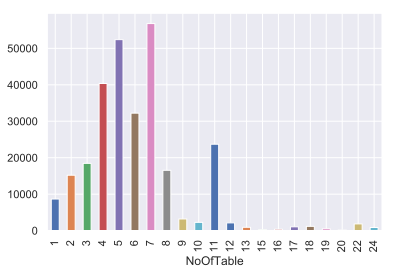

In [31]:
data_table[data_table['Day']=='Thursday'].groupby(['NoOfTable'])['Rake'].agg('mean').plot(kind='bar')

*Thursdays are pretty much similar to Wednesdays where table numbers 22,24 see highest engagements while table numbers 4,5,7 see high revenues being generated.*

#### Friday

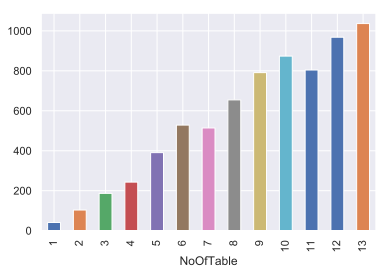

In [32]:
data_table[data_table['Day']=='Friday'].groupby(['NoOfTable'])['noofusers'].agg('mean').plot(kind='bar')

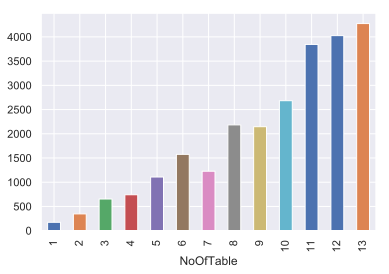

In [33]:
data_table[data_table['Day']=='Friday'].groupby(['NoOfTable'])['NoOfGames'].agg('mean').plot(kind='bar')

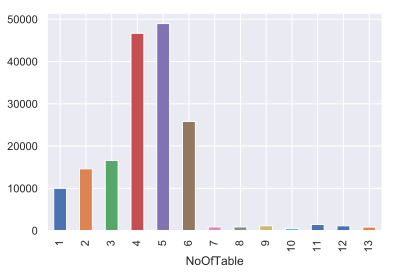

In [34]:
data_table[data_table['Day']=='Friday'].groupby(['NoOfTable'])['Rake'].agg('mean').plot(kind='bar')

*On Friday, the users reduce only 13 tables are being used. Although the number of users decreases, the engagement is always on the higher table number while table number 4 and 5 generates the highest revenues.*

#### Saturday

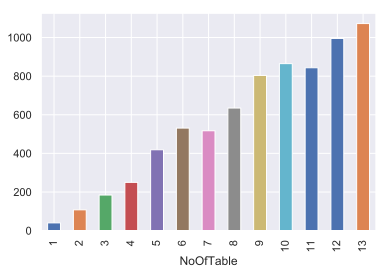

In [35]:
data_table[data_table['Day']=='Saturday'].groupby(['NoOfTable'])['noofusers'].agg('mean').plot(kind='bar')

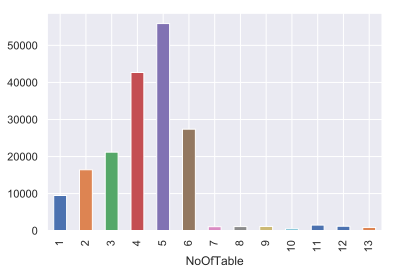

In [36]:
data_table[data_table['Day']=='Saturday'].groupby(['NoOfTable'])['Rake'].agg('mean').plot(kind='bar')

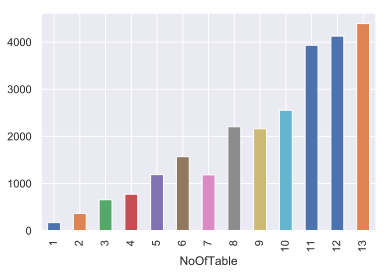

In [37]:
data_table[data_table['Day']=='Saturday'].groupby(['NoOfTable'])['NoOfGames'].agg('mean').plot(kind='bar')

*The number of tables being used on Saturday remains the same as in Friday. Table 12 and 13 observes the highest engagements in terms of number of users and games being played while table 4 and 5 generates the highest revenues. The revenue keeps declining as the number of tables increases.*

#### Sunday

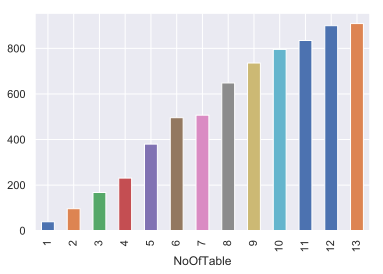

In [38]:
data_table[data_table['Day']=='Sunday'].groupby(['NoOfTable'])['noofusers'].agg('mean').plot(kind='bar')

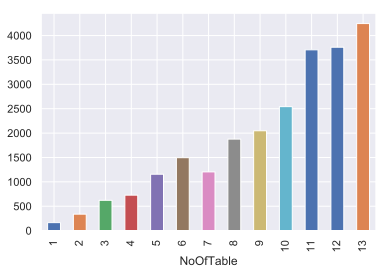

In [39]:
data_table[data_table['Day']=='Sunday'].groupby(['NoOfTable'])['NoOfGames'].agg('mean').plot(kind='bar')

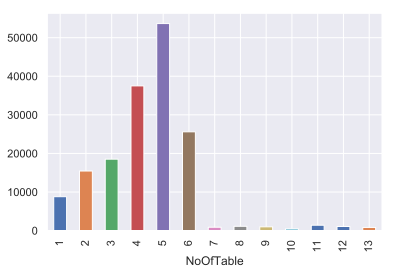

In [40]:
data_table[data_table['Day']=='Sunday'].groupby(['NoOfTable'])['Rake'].agg('mean').plot(kind='bar')

*From Fridays to Sundays, the user behavious remains the same. Only 13 tables are being used where the engagement remains highest on table 12 and 13. Table 4 and 5 remains the top revenue generating tables.*

*Let us now try to understand the features of table number - 4, 5, 13, 23, 46, 48.*

#### Table number 4 - Second highest revenue generator

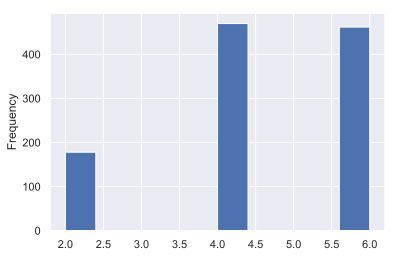

In [41]:
data_strat[data_strat['NoOfTable']==4]['Seats'].plot(kind='hist')

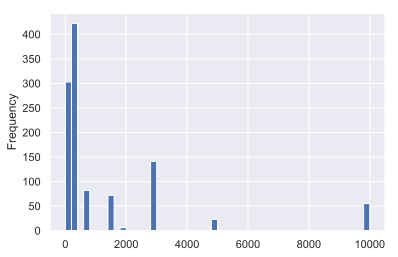

In [42]:
data_strat[data_strat['NoOfTable']==4]['EntryFee'].plot(kind='hist', bins=50)

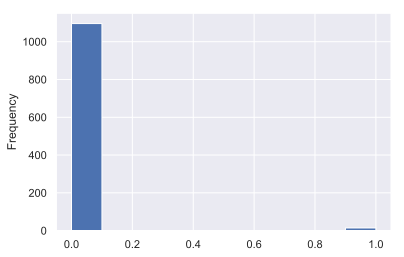

In [43]:
data_strat[data_strat['NoOfTable']==4]['Rapid'].plot(kind='hist')

*The number of seats in table number 4 are usually 4 and 6, which means games are more competitive. <br>
The entry fees are usually very low and users leave the tables without betting higher amounts. Also, no rapid is applicable.*

#### Table number 5 - Highest revenue generator

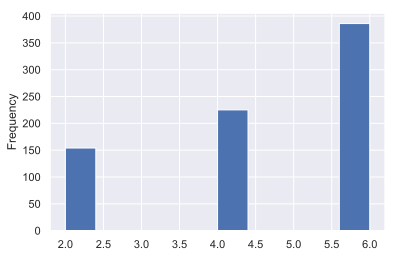

In [44]:
data_strat[data_strat['NoOfTable']==5]['Seats'].plot(kind='hist')

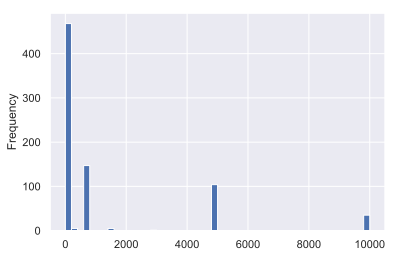

In [45]:
data_strat[data_strat['NoOfTable']==5]['EntryFee'].plot(kind='hist', bins=50)

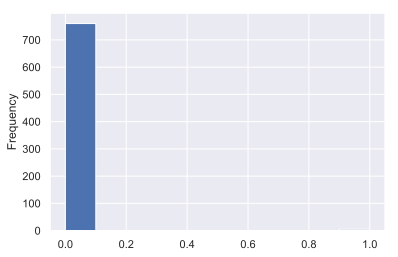

In [46]:
data_strat[data_strat['NoOfTable']==5]['Rapid'].plot(kind='hist')

*Compared to table number 4, table number 5 are mostly 6 seater and have even lower entry fees. Most users play with lower fees and leave the table. There is no rapid applicable.*

#### Table number 13 and 23

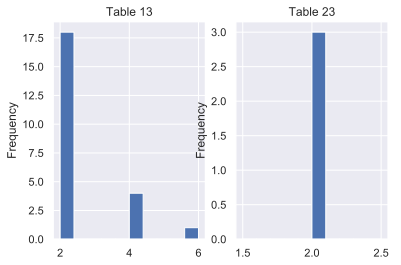

In [48]:
fig, ax = plt.subplots(ncols=2)
data_strat[data_strat['NoOfTable']==13]['Seats'].plot(kind='hist', ax= ax[0], title = 'Table 13')
data_strat[data_strat['NoOfTable']==23]['Seats'].plot(kind='hist', ax= ax[1], title = 'Table 23')

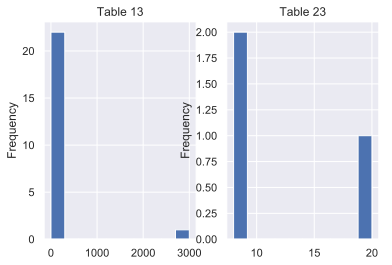

In [49]:
fig, ax = plt.subplots(ncols=2)
data_strat[data_strat['NoOfTable']==13]['EntryFee'].plot(kind='hist', ax= ax[0], title = 'Table 13')
data_strat[data_strat['NoOfTable']==23]['EntryFee'].plot(kind='hist', ax= ax[1], title = 'Table 23')

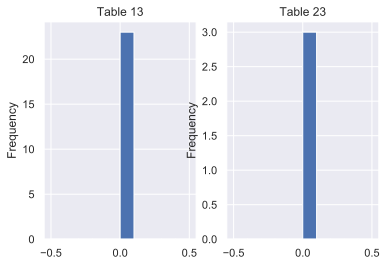

In [50]:
fig, ax = plt.subplots(ncols=2)
data_strat[data_strat['NoOfTable']==13]['Rapid'].plot(kind='hist', ax= ax[0], title = 'Table 13')
data_strat[data_strat['NoOfTable']==23]['Rapid'].plot(kind='hist', ax= ax[1], title = 'Table 23')

*Table number 13 and 23 have lower entry fees but they have on average 2 seats only. Also no rapid is applicable.*

#### Table number 46 and 48

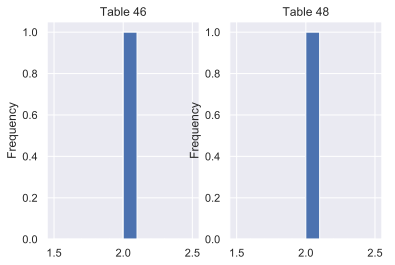

In [51]:
fig, ax = plt.subplots(ncols=2)
data_strat[data_strat['NoOfTable']==46]['Seats'].plot(kind='hist', ax= ax[0], title = 'Table 46')
data_strat[data_strat['NoOfTable']==48]['Seats'].plot(kind='hist', ax= ax[1], title = 'Table 48')

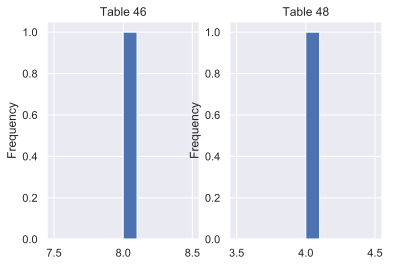

In [52]:
fig, ax = plt.subplots(ncols=2)
data_strat[data_strat['NoOfTable']==46]['EntryFee'].plot(kind='hist', ax= ax[0], title = 'Table 46')
data_strat[data_strat['NoOfTable']==48]['EntryFee'].plot(kind='hist', ax= ax[1], title = 'Table 48')

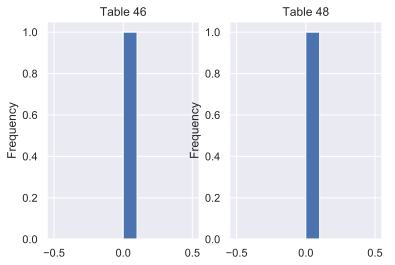

In [53]:
fig, ax = plt.subplots(ncols=2)
data_strat[data_strat['NoOfTable']==46]['Rapid'].plot(kind='hist', ax= ax[0], title = 'Table 46')
data_strat[data_strat['NoOfTable']==48]['Rapid'].plot(kind='hist', ax= ax[1], title = 'Table 48')

*Table 46 and 48 also have only 2 seats. The entry fees is comparatively higher than table 13 and 23. No rapid is applicable. <br>
Based on the above graphs it can be observed that higher the number of seats, higher is the revenue while lower seats lead to higher engagement in terms of number of users and games. The feature of Rapid has no role to play either in generating revenue or in increasing the engagement. On average, users prefer lower entry fees.*

*Now let us understand the different features of Table number.* 

#### Impact of Rapid on Revenue

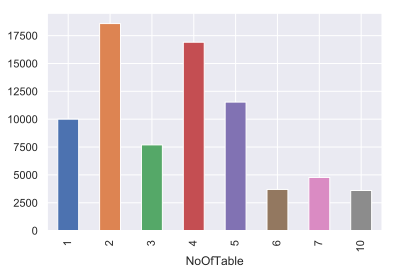

In [54]:
data[data['Rapid']==1].groupby(['NoOfTable'])['Rake'].agg('mean').plot(kind='bar')

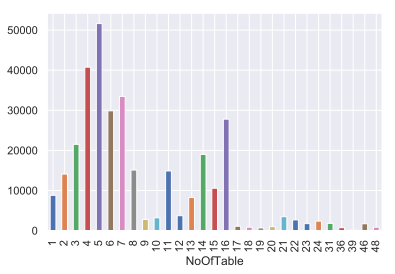

In [55]:
data[data['Rapid']==0].groupby(['NoOfTable'])['Rake'].agg('mean').plot(kind='bar')

*Only few tables have Rapid feature and the revenue generated is quite less. <br>
Higher revenues are generated from tables where there is no Rapid feature. It can be seen that the feature of Rapid of no benefit to the platform.*

#### Impact of Seats on Revenue and Engagement

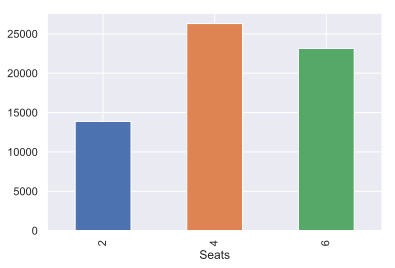

In [56]:
data.groupby(['Seats'])['Rake'].agg('mean').plot(kind='bar')

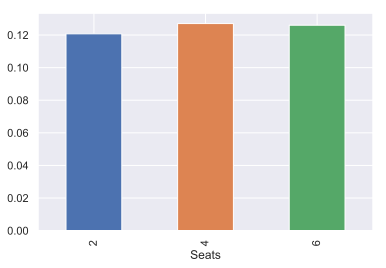

In [60]:
data.groupby(['Seats'])['gameRake'].agg('mean').plot(kind='bar')

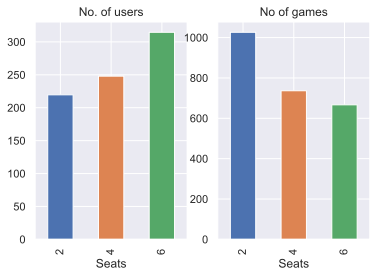

In [57]:
fig, ax = plt.subplots(ncols=2)
data.groupby(['Seats'])['noofusers'].agg('mean').plot(kind='bar', ax= ax[0], title = 'No. of users')
data.groupby(['Seats'])['NoOfGames'].agg('mean').plot(kind='bar', ax= ax[1], title = 'No of games')

*It can be observed that 4 seaters generate the highest revenues while number of users are mostly higher on 6 seaters and number of games being played are higher on 2 seaters.*

#### Impact of Entry fee on engagement

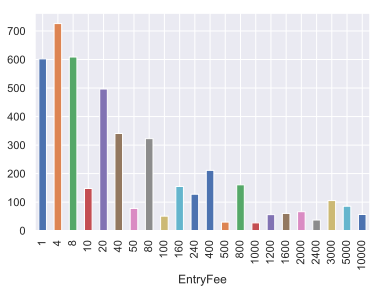

In [58]:
data.groupby(['EntryFee'])['noofusers'].agg('mean').plot(kind='bar')

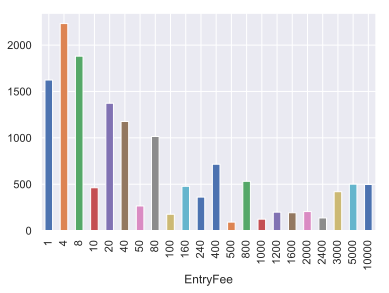

In [59]:
data.groupby(['EntryFee'])['NoOfGames'].agg('mean').plot(kind='bar')

*Users usually prefer lower entry fees as the stakes are less. It means that the users are more risk averse. <br>
As the stakes get higher, the number of users and games decline exponentially. It can also be concluded that most of the users are casual players while only few of the lot are professional and can play at higher stakes.*

## Inference Report

Below is the summary of the analysis above and recommendations - 

- Between the observation period, 2370757 users played the game
- Between the observation period, 7487612 games were played
- Between the observation period, 194170578.78 revenue was made
- The engagement in the platform in terms of number of users and games being played are in the following order - Saturday -> Tuesday -> Friday
- Revenue generated on average in the platform are in the following order - Saturday -> Tuesday -> Friday
- Tuesdays observe a rush in the number of users and tables used due to promotional events, this also generates high revenues
- Fridays and Saturdays observe a rush in number of users due to weekend vibes, but higher tables are not used
- Table 4 and 5 generate highest revenues on any given day
- Table 13, 23, 46 and 48 generate highest engagements
- The feature of Rapid is of no business value as it does not generate revenue and engagement
- Users prefer 2 seaters while higher revenue is made from 4 and 6 seaters
- Lower entry fees attract more users and also generates higher revenues
- Most of the users are casual risk-averse players and only a few are professionals who plays at higher entry fees

**Recommendations**
<br>
- The number of seats is a driving factor in generating revenue and attracting users. The game rake should be increased for 2 seaters since the number of users are higher.
- Replacing 6 seaters with 3 seaters may improve the revenue generated. Higher table numbers may have 3 seaters instead of 2 to increase revenue since they already attract higher user engagement.
- Number of tables may be removed as tables from 10-31 do not contribute significantly to revenue and user engagement.
- The feature of Rapid can be removed altogether since it is neither generating revenue nor user engagement.
- Promotional events should be extended to Fridays and Saturdays as these days attract more users.
- Tables for Casual users and Professional users should be separated.
- Platform should be able to handle higher user load as engagement decreases as number of users increase.
